## This project was a collaborative effort between two students:
- **Lazanaki Artemis** - **sdi2100081**
- **Efthymia Papafili** - **sdi2100144**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from transformers import pipeline
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
nltk.download('stopwords')
from sklearn.metrics import accuracy_score
import gensim.downloader as api
import math
from scipy.stats import pearsonr

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Part 1 : Study overtime

## 2019

### Load data of 2019

In [3]:
comms_feb = pd.read_csv('/content/drive/MyDrive/data/2019/febrouary/reviews.csv')
df_comms_feb = pd.DataFrame(comms_feb)

comms_mar = pd.read_csv('/content/drive/MyDrive/data/2019/march/reviews.csv')
df_comms_mar = pd.DataFrame(comms_mar)

comms_apr = pd.read_csv('/content/drive/MyDrive/data/2019/april/reviews.csv')
df_comms_april = pd.DataFrame(comms_apr)

comments_2019 = pd.concat([df_comms_feb,df_comms_mar,df_comms_april])


### Useful functions for cleaning data

In [4]:
def tolower(x):
    x = x.lower()
    return x

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

english_stop_words = set(stopwords.words('english'))

def remove_english_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in english_stop_words]
    return ' '.join(filtered_words)

def clean_html(text):
    return BeautifulSoup(text, "lxml").text
# Provided set of stop words

# Calculate the additional stop words
additional_stop_words = {"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"}
english_stop_words = english_stop_words.union(additional_stop_words)
sentiment_keywords = [
    "bad", "poor", "worst", "rude", "delayed", "uncomfortable", "lost", "issue",
    "disappointed", "delay", "hard", "terrible", "missed", "limited", "cold",
    "fault", "cramped", "issues", "refused", "complaint"
]
# Filter reviews containing sentiment keywords
def contains_sentiment_keyword(review, keywords):
    review_words = review.lower().split()
    for word in review_words:
        if word in keywords:
            return True
    return False

### Data Cleansing

In [5]:
comments_2019 = comments_2019['comments'].drop_duplicates()
comments_2019 = comments_2019.to_frame()
comments_2019 = comments_2019.dropna(subset= ['comments'])
comments_2019['comments'] = comments_2019['comments'].apply(tolower)
comments_2019['comments'] = comments_2019['comments'].str.replace(r"[^a-z\s]", '', regex=True)
comments_2019= comments_2019[comments_2019['comments'].apply(lambda x: contains_sentiment_keyword(x, sentiment_keywords))]
comments_2019['comments'] = comments_2019['comments'].apply(remove_english_stop_words)
comments_2019['comments'] = comments_2019['comments'].str.strip()
comments_2019['comments'] = comments_2019['comments'].replace('',np.nan)
comments_2019 = comments_2019.dropna(subset= ['comments'])
comments_2019 = comments_2019['comments'].drop_duplicates().to_frame()

com19 = comments_2019.sample(n=1000)
com19['id'] = com19.index

### Assign the appropriate sentiment to each comment, according to the model

In [6]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

label_mapping = {
    '1 star': 'negative',
    '2 stars': 'negative',
    '3 stars': 'neutral',
    '4 stars': 'positive',
    '5 stars': 'positive'
}

chunk_size = 10
chunks = [com19[i:i + chunk_size] for i in range(0, com19.shape[0], chunk_size)]

def analyze_sentiments(chunk):
    results = []
    for _, row in chunk.iterrows():
        sentiment = sentiment_pipeline(row['comments'], max_length=512, truncation=True)[0]
        sentiment_label = label_mapping[sentiment['label']]
        results.append((row['id'], row['comments'], sentiment_label))
    return results

all_results = []
for chunk in chunks:
    all_results.extend(analyze_sentiments(chunk))

results_df_2019 = pd.DataFrame(all_results, columns=['id', 'review', 'sentiment'])

results_df_2019.to_csv('sentiment_analysis_results_2019.csv', index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

### Graphic representation of the sentiment's distribution

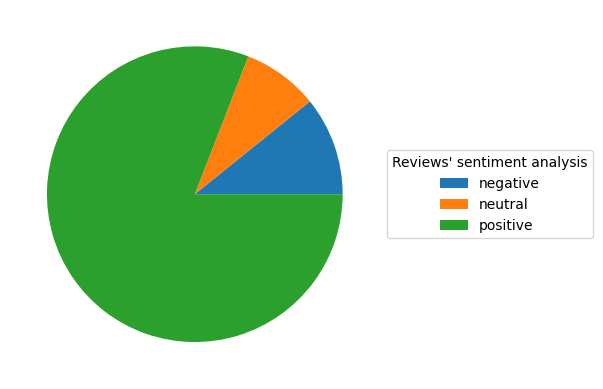

In [7]:
counts_19 = results_df_2019.groupby('sentiment')['sentiment'].count().reset_index(name='Sentiment_count')

mylabels = counts_19['sentiment'].tolist()

c = counts_19['Sentiment_count']
plt.pie(c)
plt.legend(title="Reviews' sentiment analysis", labels=mylabels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## 2023

### Load data of 2023

In [8]:
comms_feb = pd.read_csv('/content/drive/MyDrive/data/2023/june/reviews.csv')
df_comms_jun = pd.DataFrame(comms_feb)

comms_mar = pd.read_csv('/content/drive/MyDrive/data/2023/march/reviews.csv')
df_comms_mar = pd.DataFrame(comms_mar)

comms_apr = pd.read_csv('/content/drive/MyDrive/data/2023/september/reviews.csv')
df_comms_sept = pd.DataFrame(comms_apr)


### Data Cleansing

In [9]:
comments_2023 = pd.concat([df_comms_jun,df_comms_mar,df_comms_sept])
comments_2023 = comments_2023['comments'].drop_duplicates()
com23 = comments_2023.sample(n=10000)
comments_2023 = comments_2023.to_frame()

comments_2023 = comments_2023.dropna(subset= ['comments'])
comments_2023['comments'] = comments_2023['comments'].apply(tolower)
comments_2023['comments'] = comments_2023['comments'].apply(clean_html)
comments_2023['comments'] = comments_2023['comments'].str.replace(r"[^a-z\s]", '', regex=True)

comments_2023= comments_2023[comments_2023['comments'].apply(lambda x: contains_sentiment_keyword(x, sentiment_keywords))]
comments_2023['comments'] = comments_2023['comments'].str.strip()
comments_2023['comments'] = comments_2023['comments'].apply(remove_english_stop_words)
comments_2023['comments'] = comments_2023['comments'].replace('',np.nan)
comments_2023 = comments_2023.dropna(subset= ['comments'])
comments_2023 = comments_2023['comments'].drop_duplicates().to_frame()

com23 = comments_2023.sample(n=1000)
com23['id'] = com23.index

<ipython-input-4-39ad2c1fa82d>:29: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text
<ipython-input-4-39ad2c1fa82d>:29: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  return BeautifulSoup(text, "lxml").text
<ipython-input-9-e43595e57283>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_2023['comments'] = comments_2023['comments'].str.strip()


### Assign the appropriate sentiment to each comment, according to the model

In [10]:
chunks = [com23[i:i + chunk_size] for i in range(0, com23.shape[0], chunk_size)]

all_results = []
for chunk in chunks:
    all_results.extend(analyze_sentiments(chunk))

results_df_2023 = pd.DataFrame(all_results, columns=['id', 'review', 'sentiment'])

results_df_2023.to_csv('sentiment_analysis_results_2023.csv', index=False)


### Graphic representation of the sentiment's distribution

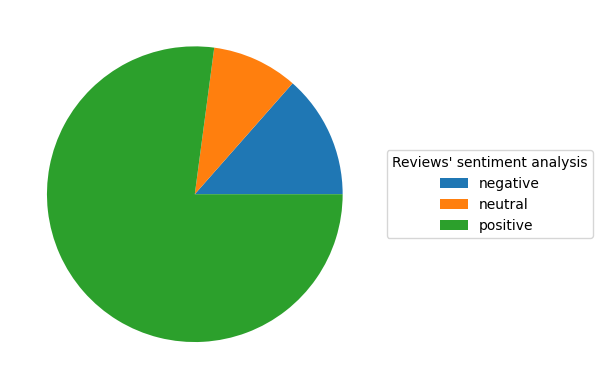

In [11]:
counts_23 = results_df_2023.groupby('sentiment')['sentiment'].count().reset_index(name='Sentiment_count')

mylabels = counts_23['sentiment'].tolist()

c = counts_23['Sentiment_count']
plt.pie(c)
plt.legend(title="Reviews' sentiment analysis", labels=mylabels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# Part 2 : Sentiment Analysis

 Making the files with the data to train and test our classification model

In [13]:
comments_19 = pd.read_csv('/content/sentiment_analysis_results_2019.csv')
comments_23 = pd.read_csv('/content/sentiment_analysis_results_2023.csv')

comments_19_df = pd.DataFrame(comments_19)
comments_23_df = pd.DataFrame(comments_23)

dataset = pd.concat([comments_19_df, comments_23_df])
dataset = dataset.drop('id', axis= 1)
dataset = dataset.drop_duplicates()
df_train, df_test = train_test_split(dataset, test_size=0.2, random_state=42)
y_test = df_test['sentiment']
x_test = df_test.drop('sentiment', axis=1)
y_train = df_train['sentiment']
x_train = df_train.drop('sentiment', axis=1)
df_train.to_csv('train.tsv', sep='\t', index=False)
x_test.to_csv('test.tsv', sep='\t', index=False)

### Create TF-IDF matrix

In [14]:
# Ensure x_train and x_test are lists of sentences
x_train_sentences = x_train["review"].tolist()
x_test_sentences = x_test["review"].tolist()

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit the vectorizer on the training data and transform both train and test data
tfidf_matrix = tfidf_vectorizer.fit_transform(x_train_sentences).toarray()
tfidf_test_matrix = tfidf_vectorizer.transform(x_test_sentences).toarray()

# Save the matrices to files
pickle.dump(tfidf_matrix, open("tfidf.pkl", "wb"))
pickle.dump(tfidf_test_matrix, open("tfidf_test.pkl", "wb"))


### Create word embeddings

In [15]:
# Load pre-trained GloVe embeddings
model_w2v = api.load("glove-wiki-gigaword-200")  # GloVe embeddings with 200 dimensions

def get_pretrained_word_embeddings(model, texts):
    embeddings = []
    for text in texts:
        words = text.split()
        word_vecs = [model[word] for word in words if word in model]
        if word_vecs:
            embeddings.append(np.mean(word_vecs, axis=0))  # Use mean instead of sum
        else:
            embeddings.append(np.zeros(model.vector_size))
    return np.array(embeddings)

# Get embeddings using pre-trained model
train_w2v = get_pretrained_word_embeddings(model_w2v, x_train_sentences)
test_w2v = get_pretrained_word_embeddings(model_w2v, x_test_sentences)

# Save the embeddings to files
pickle.dump(train_w2v, open("train_w2v.pkl", "wb"))
pickle.dump(test_w2v, open("test_w2v.pkl", "wb"))

[==================================================] 100.0% 252.1/252.1MB downloaded


### Open the .pkl files that contain the tf-idf matrix and the word embeddings

In [16]:
tfidf_matrix = pickle.load(open("tfidf.pkl", "rb"))
tfidf_test_matrix = pickle.load(open("tfidf_test.pkl", "rb"))

train_w2v = pickle.load(open("train_w2v.pkl", "rb"))
test_w2v = pickle.load(open("test_w2v.pkl", "rb"))

### Checking the classfiers SVM, Random Forests and KNN

#### SVM Classifier

##### TF-IDF

In [17]:
clf = SVC()

cv_scores = cross_val_score(clf, tfidf_matrix, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())


results cross validation: [0.80503145 0.80503145 0.79874214 0.79245283 0.79245283 0.78616352
 0.78616352 0.79874214 0.79245283 0.79245283]
mean: 0.7949685534591195


In [18]:
clf.fit(tfidf_matrix, y_train)
y_pred_tfidf_clf = clf.predict(tfidf_test_matrix)
test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y_test, y_pred_tfidf_clf, average='macro', zero_division=1)
test_accuracy = accuracy_score(y_test, y_pred_tfidf_clf)

print("SVM with TF-IDF on Test Data")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F-Measure: {test_fscore:.4f}")

SVM with TF-IDF on Test Data
Test Accuracy: 0.8090
Test Precision: 0.9357
Test Recall: 0.3675
Test F-Measure: 0.3598


##### Word embeddings

In [19]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

cv_scores = cross_val_score(clf, train_w2v, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())


results cross validation: [0.82389937 0.82389937 0.81761006 0.82389937 0.8427673  0.80503145
 0.83018868 0.82389937 0.81761006 0.83647799]
mean: 0.8245283018867925


In [20]:
clf.fit(train_w2v, y_train)
y_pred_w2v_clf = clf.predict(test_w2v)
test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y_test, y_pred_w2v_clf, average='macro', zero_division=1)
test_accuracy = accuracy_score(y_test, y_pred_w2v_clf)

print("SVM with Word Embeddings on Test Data")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F-Measure: {test_fscore:.4f}")

SVM with Word Embeddings on Test Data
Test Accuracy: 0.8266
Test Precision: 0.8532
Test Recall: 0.4648
Test F-Measure: 0.4755


#### Random Forests Classifier

##### TF-IDF

In [21]:
rf_model = RandomForestClassifier()

cv_scores = cross_val_score(rf_model, tfidf_matrix, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())


results cross validation: [0.81132075 0.80503145 0.82389937 0.79245283 0.81761006 0.81132075
 0.81761006 0.82389937 0.79245283 0.80503145]
mean: 0.810062893081761


In [22]:
rf_model.fit(tfidf_matrix, y_train)
y_pred_tfidf_rf = rf_model.predict(tfidf_test_matrix)
test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y_test, y_pred_tfidf_rf, average='macro', zero_division=1)
test_accuracy = accuracy_score(y_test, y_pred_tfidf_rf)

print("Random Forest with TF-IDF on Test Data")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F-Measure: {test_fscore:.4f}")

Random Forest with TF-IDF on Test Data
Test Accuracy: 0.8141
Test Precision: 0.8185
Test Recall: 0.3921
Test F-Measure: 0.3931


##### Word Embeddings

In [23]:
rf_model = RandomForestClassifier()
cv_scores = cross_val_score(rf_model, train_w2v, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

results cross validation: [0.81132075 0.81761006 0.81761006 0.79874214 0.79245283 0.81132075
 0.79874214 0.81761006 0.83018868 0.81761006]
mean: 0.8113207547169811


In [24]:
rf_model.fit(train_w2v, y_train)
y_pred_w2v_rf = rf_model.predict(test_w2v)
test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y_test, y_pred_w2v_rf, average='macro', zero_division=1)
test_accuracy = accuracy_score(y_test, y_pred_w2v_rf)
print("Random Forest with Word Embeddings on Test Data")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F-Measure: {test_fscore:.4f}")

Random Forest with Word Embeddings on Test Data
Test Accuracy: 0.8141
Test Precision: 0.8367
Test Recall: 0.4142
Test F-Measure: 0.4295


#### K Nearest Neighbors Classifier

##### TF-IDF

In [25]:
clf_knn = KNeighborsClassifier(n_neighbors=10)

cv_scores = cross_val_score(clf_knn, tfidf_matrix, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

results cross validation: [0.82389937 0.81761006 0.82389937 0.80503145 0.83018868 0.83018868
 0.82389937 0.81132075 0.81761006 0.79245283]
mean: 0.8176100628930818


In [26]:
clf_knn.fit(tfidf_matrix, y_train)
y_pred_tfidf_knn = clf_knn.predict(tfidf_test_matrix)
test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y_test, y_pred_tfidf_knn, average='macro', zero_division=1)
test_accuracy = accuracy_score(y_test, y_pred_tfidf_knn)

print("K Nearest Neighbors Classifier with TF-IDF on Test Data")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F-Measure: {test_fscore:.4f}")

K Nearest Neighbors Classifier with TF-IDF on Test Data
Test Accuracy: 0.8166
Test Precision: 0.4911
Test Recall: 0.4232
Test F-Measure: 0.4309


##### Word Embeddings

In [27]:
clf_knn = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf_knn, train_w2v, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

results cross validation: [0.79874214 0.81761006 0.82389937 0.80503145 0.81761006 0.81132075
 0.82389937 0.82389937 0.83647799 0.83018868]
mean: 0.8188679245283019


In [28]:
clf_knn.fit(train_w2v, y_train)
y_pred_w2v_knn = clf_knn.predict(test_w2v)
test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y_test, y_pred_w2v_knn, average='macro', zero_division=1)
test_accuracy = accuracy_score(y_test, y_pred_w2v_knn)

print("K Nearest Neighbors Classifier with Word Embeddings on Test Data")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F-Measure: {test_fscore:.4f}")

K Nearest Neighbors Classifier with Word Embeddings on Test Data
Test Accuracy: 0.8166
Test Precision: 0.7925
Test Recall: 0.4377
Test F-Measure: 0.4472


# Part 3 : Similarity and semantic neighbourhoods

In [29]:
# Define the power function
def power(num):
    return pow(num, 2)

# Define the function to get semantic neighbors
def get_semantic_neighbors(word, topn):
    return model_w2v.most_similar(word, topn=topn)

# Define the function to calculate similarity between words
def calculate_similarity(word1, word2, topn):
    # Calculate similarity between the two words
    similarity_score = model_w2v.similarity(word1, word2)

    # Get the semantic neighbors
    neighbors1 = get_semantic_neighbors(word1, topn)
    neighbors2 = get_semantic_neighbors(word2, topn)

    # Maximum similarity of neighborhoods
    max_sim_1 = max([model_w2v.similarity(word1, neigh2[0]) for neigh2 in neighbors2])
    max_sim_2 = max([model_w2v.similarity(word2, neigh1[0]) for neigh1 in neighbors1])

    max_sim = max(max_sim_1, max_sim_2)

    # Correlation of neighborhood similarity
    sim1 = [model_w2v.similarity(word1, neigh2[0]) for neigh2 in neighbors2]
    sim2 = [model_w2v.similarity(word2, neigh1[0]) for neigh1 in neighbors1]

    cor12 = pearsonr([neigh1[1] for neigh1 in neighbors1], [neigh2[1] for neigh2 in neighbors2])
    cor21 = pearsonr(sim1, sim2)

    correlation = max(cor12, cor21)[0]

    sum_1 = list(map(power, sim1))
    sum_1 = sum(sum_1)

    sum_2 = list(map(power, sim2))
    sum_2 = sum(sum_2)

    sum_of_squares = math.sqrt(sum_1 + sum_2)

    return {
        "neighbors1": neighbors1,
        "neighbors2": neighbors2,
        "max_similarity": max_sim,
        "correlation": correlation,
        "sum_of_squares": sum_of_squares
    }

# Define the function to show semantic neighborhood of a word
def show_semantic_neighborhood(word):
    neighbors = get_semantic_neighbors(word, 8)
    print(f"The semantic neighborhood of the word: '{word}' is:")
    for neigh in neighbors:
        print(neigh[0])
    print("\n")

# User inputs for words
word1 = input("Enter first word: ")
word2 = input("Enter second word: ")
topn = 10

# Calculate similarity metrics between the two words
similarity_metrics = calculate_similarity(word1, word2, topn)

# Display the results
print(f"Neighbors of '{word1}': {similarity_metrics['neighbors1']}")
print(f"Neighbors of '{word2}': {similarity_metrics['neighbors2']}")
print(f"Similarity metrics between '{word1}' and '{word2}':")
print(f"Maximum similarity: {similarity_metrics['max_similarity']:.4f}")
print(f"Correlation of neighborhood similarities: {similarity_metrics['correlation']:.4f}")
print(f"Sum of squared neighborhood similarities: {similarity_metrics['sum_of_squares']:.4f}")

# Display semantic neighborhoods of example words
show_semantic_neighborhood("host")
show_semantic_neighborhood("dirty")
show_semantic_neighborhood("bad")

Enter first word: apartment
Enter second word: view
Neighbors of 'apartment': [('bedroom', 0.7657642364501953), ('apartments', 0.7412739992141724), ('rented', 0.6728134155273438), ('basement', 0.6546065211296082), ('condominium', 0.6364909410476685), ('townhouse', 0.6278818845748901), ('hotel', 0.6156034469604492), ('room', 0.6149617433547974), ('upstairs', 0.6051762700080872), ('manhattan', 0.601713240146637)]
Neighbors of 'view': [('views', 0.8132389187812805), ('viewed', 0.6858992576599121), ('perspective', 0.6829386353492737), ('fact', 0.6394168734550476), ('indeed', 0.6343290209770203), ('what', 0.6314751505851746), ('look', 0.6306207776069641), ('believe', 0.6281221508979797), ('seen', 0.6266553997993469), ('that', 0.6245580911636353)]
Similarity metrics between 'apartment' and 'view':
Maximum similarity: 0.4413
Correlation of neighborhood similarities: 0.8896
Sum of squared neighborhood similarities: 1.1631
The semantic neighborhood of the word: 'host' is:
hosts
hosting
hosted
s

By the observation of the results, we concluded that as the parameter topn grows, so does the value of maximum similarity of neighborhoods and the value of sum of squared neighbourhoods similarity. Nevertheless, the value of the correlation of neighborhood similarities have an unstable behavior, as sometimes it decreases and sometimes rises, depending on the words given.By the observation of the results, we concluded that as the parameter **topn grows**, **so does** the value of **maximum** similarity of neighborhoods and the value of **sum of squared** neighbourhoods similarity. Nevertheless, the value of the correlation of neighborhood similarities have an **unstable behavior**, as sometimes it decreases and sometimes it rises, depending on the words given.